In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def import_dataset():
    data = np.load('../data/d_dataset_p1/dataset.npz')
    ns_aggregate_param = data['ns_aggregate_param'].tolist()
    ns_aggregate_phonetic = data['ns_aggregate_phonetic'].tolist()
    return ns_aggregate_param, ns_aggregate_phonetic

In [3]:
param, phonetic = import_dataset()

In [4]:
len(param)

40307

In [5]:
phonetic_hist = [item[0]+item[1] for item in phonetic]

In [6]:
ratio = 0.8

In [7]:
def split_data(audio, param, phonetic, val_test_ratio=0.3):
    
    total_size = len(phonetic)
    train_size = int((1-val_test_ratio)*total_size)
    data_idx = range(len(phonetic)) 
    
    idx = np.random.choice(data_idx, size=train_size, replace = False)
    train_audio = [audio[i] for i in idx]
    train_param = [param[i] for i in idx]
    train_phonetic = [phonetic[i] for i in idx]
    
    test_data_idx = [i for i in data_idx if i not in idx]
    test_idx = np.random.choice(test_data_idx, size=int((total_size - train_size)/2), replace = False)
    test_audio = [audio[i] for i in test_idx]
    test_param = [param[i] for i in test_idx]
    test_phonetic = [phonetic[i] for i in test_idx]
    
    val_data_idx = [i for i in data_idx if (i not in idx) or (i not in test_data_idx)]
    val_audio = [audio[i] for i in val_data_idx]
    val_param = [param[i] for i in val_data_idx]
    val_phonetic = [phonetic[i] for i in val_data_idx]
    
    return train_audio, train_param, train_phonetic, test_audio, test_param, test_phonetic, val_audio, val_param, val_phonetic

In [18]:
def split_data(param, phonetic, val_test_ratio=0.3):
    
    total_size = len(phonetic)
    train_size = int((1-val_test_ratio)*total_size)
    data_idx = range(len(phonetic)) 
    
    idx = np.random.choice(data_idx, size=train_size, replace = False)

    train_param = [param[i] for i in idx]
    train_phonetic = [phonetic[i] for i in idx]
    
    test_data_idx = [i for i in data_idx if i not in idx]
    test_idx = np.random.choice(test_data_idx, size=int((total_size - train_size)/2), replace = False)

    test_param = [param[i] for i in test_idx]
    test_phonetic = [phonetic[i] for i in test_idx]
    
    val_data_idx = [i for i in data_idx if (i not in idx) and (i not in test_idx)]
    val_param = [param[i] for i in val_data_idx]
    val_phonetic = [phonetic[i] for i in val_data_idx]
    
    return train_param, train_phonetic, test_param, test_phonetic, val_param, val_phonetic

In [19]:
train_param, train_phonetic, test_param, test_phonetic, val_param, val_phonetic = split_data(param, phonetic, val_test_ratio=0.3)

In [20]:
'{}, {}, {}'.format(len(train_param),len(test_phonetic),len(val_phonetic))

'28214, 6046, 6047'

In [86]:
count = 0
for i in train_param:
    if i in val_param:
        count += 1
print(count)

0


In [88]:
len(test_param)

6046

In [89]:
len(train_param)

28214

In [93]:
40307 - 6046 - 28214

6047

<BarContainer object of 342 artists>

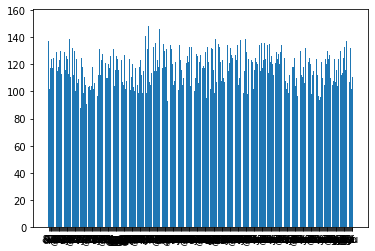

In [57]:
unique, counts = np.unique(phonetic_hist, return_counts=True)
numeric = dict(zip(unique, counts))
plt.bar(unique, counts)

In [69]:
train = [phonetic_hist[i] for i in a]

In [71]:
len(train)

32245

<BarContainer object of 342 artists>

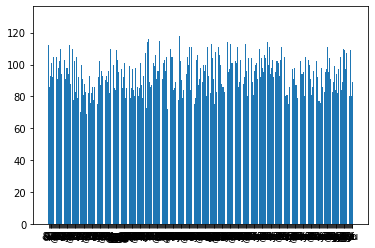

In [65]:
unique, counts = np.unique(train, return_counts=True)
train_numeric = dict(zip(unique, counts))
plt.bar(unique, counts)

In [73]:
test = [phonetic_hist[i] for i in range(len(phonetic_hist)) if i not in a]

In [74]:
len(test)

8062

<BarContainer object of 342 artists>

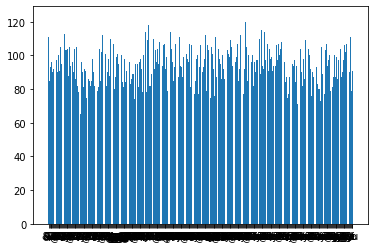

In [63]:
unique, counts = np.unique(test, return_counts=True)
numeric = dict(zip(unique, counts))
plt.bar(unique, counts)

In [66]:
train_numeric

{'&2': 112,
 '&7': 86,
 '&9': 93,
 '&@': 101,
 '&A': 92,
 '&E': 105,
 '&E:': 128,
 '&M': 87,
 '&O': 109,
 '&Q': 105,
 '&U': 91,
 '&V': 98,
 '&a': 102,
 '&e': 110,
 '&i': 94,
 '&o': 80,
 '&u': 86,
 '&y': 92,
 '2&': 103,
 '27': 91,
 '29': 98,
 '2@': 98,
 '2A': 94,
 '2E': 112,
 '2E:': 88,
 '2M': 87,
 '2O': 88,
 '2Q': 110,
 '2U': 78,
 '2V': 102,
 '2a': 83,
 '2e': 105,
 '2i': 79,
 '2o': 92,
 '2u': 113,
 '2y': 82,
 '7&': 70,
 '72': 100,
 '79': 91,
 '7@': 81,
 '7A': 88,
 '7E': 83,
 '7E:': 69,
 '7M': 70,
 '7O': 78,
 '7Q': 82,
 '7U': 93,
 '7V': 76,
 '7a': 82,
 '7e': 86,
 '7i': 78,
 '7o': 86,
 '7u': 84,
 '7y': 99,
 '9&': 86,
 '92': 75,
 '97': 92,
 '9@': 102,
 '9A': 87,
 '9E': 96,
 '9E:': 93,
 '9M': 102,
 '9O': 92,
 '9Q': 100,
 '9U': 90,
 '9V': 93,
 '9a': 89,
 '9e': 96,
 '9i': 82,
 '9o': 110,
 '9u': 87,
 '9y': 91,
 '@&': 93,
 '@2': 100,
 '@7': 85,
 '@9': 84,
 '@A': 109,
 '@E': 103,
 '@E:': 95,
 '@M': 130,
 '@O': 99,
 '@Q': 97,
 '@U': 97,
 '@V': 85,
 '@a': 92,
 '@e': 101,
 '@i': 79,
 '@o': 85,
 '@